In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Fixation probability

In [1]:
from direct_method import fixation_probability_direct_method

In [2]:
from simulation_when_to_stop import estimate_fixation_probability

### beta = 1.0

In [4]:
n_values = list(range(5, 31, 5))
abs_error = []
for n in n_values:
    # dominance
    sim_dom = estimate_fixation_probability(pop_size=n, beta=1.0, a=1.0, b=1.0, c=0.0, d=0.0, epsilon=0.01, delta=0.1, r_0=100)
    direct_dom = fixation_probability_direct_method(pop_size=n, beta=1.0, a=1.0, b=1.0, c=0.0, d=0.0)
    
    #bistability
    sim_bistab = estimate_fixation_probability(pop_size=n, beta=1.0, a=1.0, b=0.0, c=0.0, d=1.0, epsilon=0.01, delta=0.1, r_0=100)
    direct_bistab = fixation_probability_direct_method(pop_size=n, beta=1.0, a=1.0, b=0.0, c=0.0, d=1.0)
    
    #coexistence
    sim_coex = estimate_fixation_probability(pop_size=n, beta=1.0, a=0.0, b=1.0, c=1.0, d=0.0, epsilon=0.01, delta=0.1, r_0=100)
    direct_coex = fixation_probability_direct_method(pop_size=n, beta=1.0, a=0.0, b=1.0, c=1.0, d=0.0)
    
    abs_error_dom = abs(sim_dom - direct_dom)
    abs_error_bistab = abs(sim_bistab - direct_bistab)
    abs_error_coex = abs(sim_coex - direct_coex)
    
    
    abs_error.append({"n": n, "dominance": abs_error_dom, "bistability": abs_error_bistab, "coexistence": abs_error_coex})

In [10]:
df = pd.DataFrame(abs_error)
df.set_index("n")

,bistability,coexistence,dominance
n,,,
5,0.000514,0.003469,0.000563
10,0.000277,0.005175,0.000606
15,0.001989,0.003543,0.004886
20,0.000171,0.000818,0.000605
25,0.000137,0.005549,0.007627
30,0.000094,0.001557,0.004573


Text(0,0.5,'Absolute error')

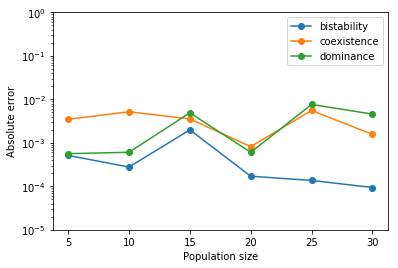

In [11]:
fig, ax = plt.subplots()
ax.plot(df.loc[:,"n"], df.loc[:,"bistability"], '-o', label='bistability')
ax.plot(df.loc[:,"n"], df.loc[:,"coexistence"], '-o', label='coexistence')
ax.plot(df.loc[:,"n"], df.loc[:,"dominance"], '-o', label='dominance')
ax.set_yscale('log')
ax.legend()
plt.ylim([10**(-5),10**(0)])
plt.xlabel("Population size")
plt.ylabel("Absolute error")

In [ ]:
fig.savefig('../../../manuscript/Figures/accuracy_simulated_prob_beta_1_0.pdf')

### beta = 0.1

In [12]:
n_values = list(range(5, 31, 5))
abs_error_0_1 = []
for n in n_values:
    # dominance
    sim_dom = estimate_fixation_probability(pop_size=n, beta=0.1, a=1.0, b=1.0, c=0.0, d=0.0, epsilon=0.01, delta=0.1, r_0=100)
    direct_dom = fixation_probability_direct_method(pop_size=n, beta=0.1, a=1.0, b=1.0, c=0.0, d=0.0)
    
    #bistability
    sim_bistab = estimate_fixation_probability(pop_size=n, beta=0.1, a=1.0, b=0.0, c=0.0, d=1.0, epsilon=0.01, delta=0.1, r_0=100)
    direct_bistab = fixation_probability_direct_method(pop_size=n, beta=0.1, a=1.0, b=0.0, c=0.0, d=1.0)
    
    #coexistence
    sim_coex = estimate_fixation_probability(pop_size=n, beta=0.1, a=0.0, b=1.0, c=1.0, d=0.0, epsilon=0.01, delta=0.1, r_0=100)
    direct_coex = fixation_probability_direct_method(pop_size=n, beta=0.1, a=0.0, b=1.0, c=1.0, d=0.0)
    
    abs_error_dom = abs(sim_dom - direct_dom)
    abs_error_bistab = abs(sim_bistab - direct_bistab)
    abs_error_coex = abs(sim_coex - direct_coex)
    
    
    abs_error_0_1.append({"n": n, "dominance": abs_error_dom, "bistability": abs_error_bistab, "coexistence": abs_error_coex})

In [13]:
df_0_1 = pd.DataFrame(abs_error_0_1)
df_0_1.set_index("n")

,bistability,coexistence,dominance
n,,,
5,0.000643,0.000098,0.001002
10,0.000051,0.000878,0.000329
15,0.005157,0.000154,0.000359
20,0.001950,0.001432,0.002478
25,0.006324,0.002676,0.002961
30,0.001296,0.008201,0.001656


Text(0,0.5,'Absolute error')

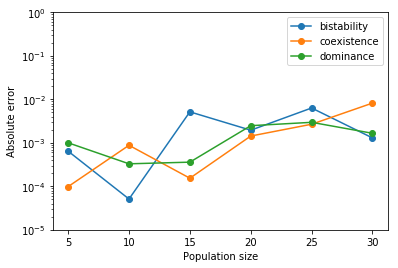

In [14]:
fig, ax = plt.subplots()
ax.plot(df_0_1.loc[:,"n"], df_0_1.loc[:,"bistability"], '-o', label='bistability')
ax.plot(df_0_1.loc[:,"n"], df_0_1.loc[:,"coexistence"], '-o', label='coexistence')
ax.plot(df_0_1.loc[:,"n"], df_0_1.loc[:,"dominance"], '-o', label='dominance')
ax.set_yscale('log')
ax.legend()
plt.ylim([10**(-5),10**(0)])
plt.xlabel("Population size")
plt.ylabel("Absolute error")

In [ ]:
fig.savefig('../../../manuscript/Figures/accuracy_simulated_prob_beta_0_1.pdf')

# Fixation time

In [9]:
from direct_method import direct_conditional_fixation_time

In [10]:
from simulation_when_to_stop import estimate_conditional_fixation_time

## Conditional fixation time

### beta = 1.0

In [14]:
n_values = list(range(5, 51, 5))
cond_rel_error_1_0 = []
for n in n_values:
    #dominance
    tau_sim_dom = estimate_conditional_fixation_time(pop_size=n, beta=1.0, a=1.0, b=1.0, c=0.0, d=0.0, epsilon=0.01, k=100, r_0=100)
    tau_direct_dom = direct_conditional_fixation_time(pop_size=n, beta=1.0, a=1.0, b=1.0, c=0.0, d=0.0)
    
    #bistability
    tau_sim_bistab = estimate_conditional_fixation_time(pop_size=n, beta=1.0, a=1.0, b=0.0, c=0.0, d=1.0, epsilon=0.01, k=100, r_0=100)
    tau_direct_bistab = direct_conditional_fixation_time(pop_size=n, beta=1.0, a=1.0, b=0.0, c=0.0, d=1.0)
    
    #coexistence
    tau_sim_coex = estimate_conditional_fixation_time(pop_size=n, beta=1.0, a=0.0, b=1.0, c=1.0, d=0.0, epsilon=0.01, k=100, r_0=100)
    tau_direct_coex = direct_conditional_fixation_time(pop_size=n, beta=1.0, a=0.0, b=1.0, c=1.0, d=0.0)
    
    rel_error_dom = abs(tau_sim_dom - tau_direct_dom)/tau_direct_dom
    rel_error_bistab = abs(tau_sim_bistab - tau_direct_bistab)/tau_direct_bistab
    rel_error_coex = abs(tau_sim_coex - tau_direct_coex)/tau_direct_coex
    
    
    cond_rel_error_1_0.append({"n": n, "dominance": rel_error_dom, "bistability": rel_error_bistab, "coexistence": rel_error_coex})

In [15]:
df = pd.DataFrame(cond_rel_error_1_0)
df.set_index("n")

,bistability,coexistence,dominance
n,,,
5,0.026981,0.068844,0.022761
10,0.014339,0.051702,0.008883
15,0.028410,0.018636,0.011588
20,0.031804,0.056359,0.008049
25,0.003726,0.080625,0.007726
30,0.039006,0.017185,0.002327
35,0.002756,0.007980,0.012702
40,0.018746,0.046113,0.012813
45,0.019372,0.053575,0.022353


Text(0,0.5,'Relative error')

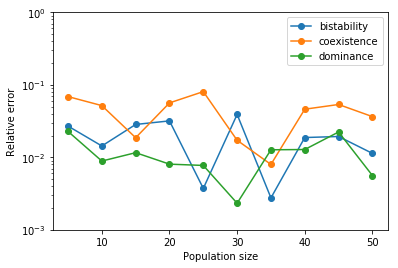

In [16]:
fig, ax = plt.subplots()
ax.plot(df.loc[:,"n"], df.loc[:,"bistability"], '-o', label='bistability')
ax.plot(df.loc[:,"n"], df.loc[:,"coexistence"], '-o', label='coexistence')
ax.plot(df.loc[:,"n"], df.loc[:,"dominance"], '-o', label='dominance')
ax.set_yscale('log')
ax.legend()
plt.ylim([10**(-3),10**(0)])
plt.xlabel("Population size")
plt.ylabel("Relative error")

In [ ]:
fig.savefig('../../../manuscript/Figures/accuracy_simulated_time_beta_1_0.pdf')

### beta = 0.1

In [17]:
n_values = list(range(5, 51, 5))
cond_rel_error_0_1 = []
for n in n_values:
    #dominance
    tau_sim_dom = estimate_conditional_fixation_time(pop_size=n, beta=0.1, a=1.0, b=1.0, c=0.0, d=0.0, epsilon=0.01, k=100, r_0=100)
    tau_direct_dom = direct_conditional_fixation_time(pop_size=n, beta=0.1, a=1.0, b=1.0, c=0.0, d=0.0)
    
    #bistability
    tau_sim_bistab = estimate_conditional_fixation_time(pop_size=n, beta=0.1, a=1.0, b=0.0, c=0.0, d=1.0, epsilon=0.01, k=100, r_0=100)
    tau_direct_bistab = direct_conditional_fixation_time(pop_size=n, beta=0.1, a=1.0, b=0.0, c=0.0, d=1.0)
    
    #coexistence
    tau_sim_coex = estimate_conditional_fixation_time(pop_size=n, beta=0.1, a=0.0, b=1.0, c=1.0, d=0.0, epsilon=0.01, k=100, r_0=100)
    tau_direct_coex = direct_conditional_fixation_time(pop_size=n, beta=0.1, a=0.0, b=1.0, c=1.0, d=0.0)
    
    rel_error_dom = abs(tau_sim_dom - tau_direct_dom)/tau_direct_dom
    rel_error_bistab = abs(tau_sim_bistab - tau_direct_bistab)/tau_direct_bistab
    rel_error_coex = abs(tau_sim_coex - tau_direct_coex)/tau_direct_coex
    
    
    cond_rel_error_0_1.append({"n": n, "dominance": rel_error_dom, "bistability": rel_error_bistab, "coexistence": rel_error_coex})

In [18]:
df_0_1 = pd.DataFrame(cond_rel_error_0_1)
df_0_1.set_index("n")

,bistability,coexistence,dominance
n,,,
5,0.001980,0.005955,0.037110
10,0.055779,0.003809,0.005256
15,0.029847,0.022356,0.019899
20,0.018342,0.003850,0.018410
25,0.006186,0.014854,0.050047
30,0.019684,0.046164,0.004959
35,0.003608,0.008053,0.008273
40,0.021695,0.026744,0.023512
45,0.009893,0.005179,0.009844


Text(0,0.5,'Relative error')

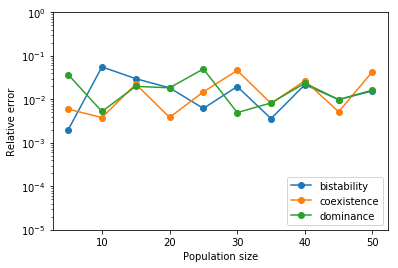

In [19]:
fig, ax = plt.subplots()
ax.plot(df_0_1.loc[:,"n"], df_0_1.loc[:,"bistability"], '-o', label='bistability')
ax.plot(df_0_1.loc[:,"n"], df_0_1.loc[:,"coexistence"], '-o', label='coexistence')
ax.plot(df_0_1.loc[:,"n"], df_0_1.loc[:,"dominance"], '-o', label='dominance')
ax.set_yscale('log')
ax.legend(loc='lower right')
plt.ylim([10**(-5),10**(0)])
plt.xlabel("Population size")
plt.ylabel("Relative error")

In [ ]:
fig.savefig('../../../manuscript/Figures/accuracy_simulated_time_beta_0_1.pdf')

## Unconditional fixation time

In [28]:
from direct_method import direct_unconditional_fixation_time

In [29]:
from simulation_when_to_stop import estimate_unconditional_fixation_time

### beta = 1.0

In [36]:
n_values = list(range(5, 51, 5))
uncond_rel_error = []
for n in n_values:
    #dominance
    tau_sim_dom = estimate_unconditional_fixation_time(pop_size=n, beta=1.0, a=1.0, b=1.0, c=0.0, d=0.0, epsilon=0.01, k=100, r_0=100)
    tau_direct_dom = direct_unconditional_fixation_time(pop_size=n, beta=1.0, a=1.0, b=1.0, c=0.0, d=0.0)
    
    #bistability
    tau_sim_bistab = estimate_unconditional_fixation_time(pop_size=n, beta=1.0, a=1.0, b=0.0, c=0.0, d=1.0, epsilon=0.01, k=100, r_0=100)
    tau_direct_bistab = direct_unconditional_fixation_time(pop_size=n, beta=1.0, a=1.0, b=0.0, c=0.0, d=1.0)
    
    #coexistence
    tau_sim_coex = estimate_unconditional_fixation_time(pop_size=n, beta=1.0, a=0.0, b=1.0, c=1.0, d=0.0, epsilon=0.01, k=100, r_0=100)
    tau_direct_coex = direct_unconditional_fixation_time(pop_size=n, beta=1.0, a=0.0, b=1.0, c=1.0, d=0.0)
    
    rel_error_dom = abs(tau_sim_dom - tau_direct_dom)/tau_direct_dom
    rel_error_bistab = abs(tau_sim_bistab - tau_direct_bistab)/tau_direct_bistab
    rel_error_coex = abs(tau_sim_coex - tau_direct_coex)/tau_direct_coex
    
    
    uncond_rel_error.append({"n": n, "dominance": rel_error_dom, "bistability": rel_error_bistab, "coexistence": rel_error_coex})

In [37]:
df_uncond = pd.DataFrame(uncond_rel_error)
df_uncond.set_index("n")

,bistability,coexistence,dominance
n,,,
5,0.020605,0.006825,0.013453
10,0.078572,0.039090,0.014289
15,0.039277,0.012691,0.048546
20,0.092078,0.036682,0.058581
25,0.020666,0.025136,0.001779
30,0.071096,0.036582,0.050754
35,0.048405,0.006432,0.002537
40,0.048272,0.106385,0.031230
45,0.008233,0.004171,0.078016


Text(0,0.5,'Relative error')

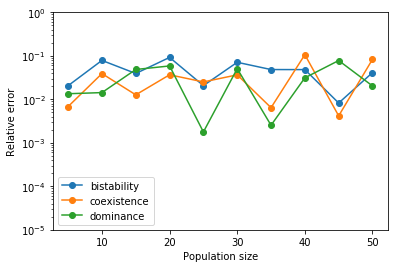

In [38]:
fig, ax = plt.subplots()
ax.plot(df_uncond.loc[:,"n"], df_uncond.loc[:,"bistability"], '-o', label='bistability')
ax.plot(df_uncond.loc[:,"n"], df_uncond.loc[:,"coexistence"], '-o', label='coexistence')
ax.plot(df_uncond.loc[:,"n"], df_uncond.loc[:,"dominance"], '-o', label='dominance')
ax.set_yscale('log')
ax.legend()
plt.ylim([10**(-5),10**(0)])
plt.xlabel("Population size")
plt.ylabel("Relative error")

In [39]:
fig.savefig('../../../manuscript/Figures/accuracy_simulated_unconditional_time_beta_1_0.pdf')

### beta = 0.1

In [32]:
n_values = list(range(5, 51, 5))
uncond_rel_error_0_1 = []
for n in n_values:
    #dominance
    tau_sim_dom = estimate_unconditional_fixation_time(pop_size=n, beta=0.1, a=1.0, b=1.0, c=0.0, d=0.0, epsilon=0.01, k=100, r_0=100)
    tau_direct_dom = direct_unconditional_fixation_time(pop_size=n, beta=0.1, a=1.0, b=1.0, c=0.0, d=0.0)
    
    #bistability
    tau_sim_bistab = estimate_unconditional_fixation_time(pop_size=n, beta=0.1, a=1.0, b=0.0, c=0.0, d=1.0, epsilon=0.01, k=100, r_0=100)
    tau_direct_bistab = direct_unconditional_fixation_time(pop_size=n, beta=0.1, a=1.0, b=0.0, c=0.0, d=1.0)
    
    #coexistence
    tau_sim_coex = estimate_unconditional_fixation_time(pop_size=n, beta=0.1, a=0.0, b=1.0, c=1.0, d=0.0, epsilon=0.01, k=100, r_0=100)
    tau_direct_coex = direct_unconditional_fixation_time(pop_size=n, beta=0.1, a=0.0, b=1.0, c=1.0, d=0.0)
    
    rel_error_dom = abs(tau_sim_dom - tau_direct_dom)/tau_direct_dom
    rel_error_bistab = abs(tau_sim_bistab - tau_direct_bistab)/tau_direct_bistab
    rel_error_coex = abs(tau_sim_coex - tau_direct_coex)/tau_direct_coex
    
    
    uncond_rel_error_0_1.append({"n": n, "dominance": rel_error_dom, "bistability": rel_error_bistab, "coexistence": rel_error_coex})

In [33]:
df_uncond_0_1 = pd.DataFrame(uncond_rel_error_0_1)
df_uncond_0_1.set_index("n")

,bistability,coexistence,dominance
n,,,
5,0.066042,0.083424,0.077236
10,0.065770,0.026060,0.034633
15,0.064304,0.078223,0.041463
20,0.013422,0.039496,0.062307
25,0.082399,0.143236,0.024873
30,0.040840,0.002681,0.017018
35,0.059487,0.026159,0.057196
40,0.215850,0.045584,0.052630
45,0.018585,0.404826,0.029508


Text(0,0.5,'Relative error')

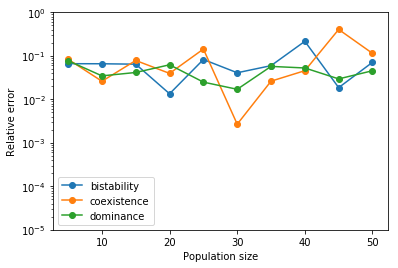

In [34]:
fig, ax = plt.subplots()
ax.plot(df_uncond_0_1.loc[:,"n"], df_uncond_0_1.loc[:,"bistability"], '-o', label='bistability')
ax.plot(df_uncond_0_1.loc[:,"n"], df_uncond_0_1.loc[:,"coexistence"], '-o', label='coexistence')
ax.plot(df_uncond_0_1.loc[:,"n"], df_uncond_0_1.loc[:,"dominance"], '-o', label='dominance')
ax.set_yscale('log')
ax.legend()
plt.ylim([10**(-5),10**(0)])
plt.xlabel("Population size")
plt.ylabel("Relative error")

In [35]:
fig.savefig('../../../manuscript/Figures/accuracy_simulated_unconditional_time_beta_0_1.pdf')

# Stationary distribution

In [5]:
from scipy.stats import entropy

In [6]:
from direct_method import direct_stationary

In [7]:
from simulation_when_to_stop import estimate_stationary

### a) beta = 0.1, mu = 0.1

In [8]:
n_values = list(range(10, 101, 10))
kullback_a = []
for n in n_values:
    #dominance
    distr_sim_dom = estimate_stationary(pop_size=n, beta=0.1, a=1.0, b=1.0, c=0.0, d=0.0, r_0=100*n, epsilon=0.0001, k=10000*n, mu=0.1)
    distr_direct_dom = direct_stationary(pop_size=n, beta=0.1, a=1.0, b=1.0, c=0.0, d=0.0, mu=0.1)
    
    #bistability
    distr_sim_bistab = estimate_stationary(pop_size=n, beta=0.1, a=1.0, b=0.0, c=0.0, d=1.0, r_0=100*n, epsilon=0.0001, k=10000*n, mu=0.1)
    distr_direct_bistab = direct_stationary(pop_size=n, beta=0.1, a=1.0, b=0.0, c=0.0, d=1.0, mu=0.1)
    
    #coexistence
    distr_sim_coex = estimate_stationary(pop_size=n, beta=0.1, a=0.0, b=1.0, c=1.0, d=0.0, r_0=100*n, epsilon=0.0001, k=10000*n, mu=0.1)
    distr_direct_coex = direct_stationary(pop_size=n, beta=0.1, a=0.0, b=1.0, c=1.0, d=0.0, mu=0.1)
    
    kullback_leibler_dom = entropy(distr_sim_dom, distr_direct_dom)
    kullback_leibler_bistab = entropy(distr_sim_bistab, distr_direct_bistab)
    kullback_leibler_coex = entropy(distr_sim_coex, distr_direct_coex)
    
    kullback_a.append({"n": n, "dominance": kullback_leibler_dom, "coexistence": kullback_leibler_coex, "bistability": kullback_leibler_bistab})


In [10]:
df_stat_a = pd.DataFrame(kullback_a)
df_stat_a.set_index("n")

,bistability,coexistence,dominance
n,,,
10,0.000166,0.000115,0.000253
20,0.000470,0.000342,0.000223
30,0.000076,0.000204,0.000533
40,0.000206,0.000107,0.000746
50,0.000217,0.000343,0.000183
60,0.000322,0.000244,0.000277
70,0.000321,0.000146,0.000302
80,0.000258,0.000146,0.000402
90,0.000294,0.000300,0.000227


Text(0,0.5,'Kullback-Leibler divergence')

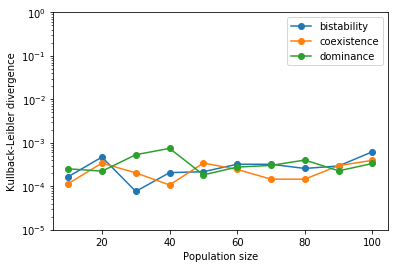

In [11]:
fig, ax = plt.subplots()
ax.plot(df_stat_a.loc[:,"n"], df_stat_a.loc[:,"bistability"], '-o', label='bistability')
ax.plot(df_stat_a.loc[:,"n"], df_stat_a.loc[:,"coexistence"], '-o', label='coexistence')
ax.plot(df_stat_a.loc[:,"n"], df_stat_a.loc[:,"dominance"], '-o', label='dominance')
ax.legend()
ax.set_yscale('log')
plt.ylim([10**(-5),10**(0)])
plt.xlabel("Population size")
plt.ylabel("Kullback-Leibler divergence")

In [ ]:
fig.savefig('../../../manuscript/Figures/accuracy_simulated_stationary_a.pdf')

### b) beta = 1.0, mu = 0.1

In [12]:
n_values = list(range(10, 101, 10))
kullback_b = []
for n in n_values:
    #dominance
    distr_sim_dom = estimate_stationary(pop_size=n, beta=1.0, a=0.0, b=1.0, c=1.0, d=0.0, r_0=100*n, epsilon=0.0001, k=10000*n, mu=0.1)
    distr_direct_dom = direct_stationary(pop_size=n, beta=1.0, a=0.0, b=1.0, c=1.0, d=0.0, mu=0.1)
    
    #bistability
    distr_sim_bistab = estimate_stationary(pop_size=n, beta=1.0, a=1.0, b=0.0, c=0.0, d=1.0, r_0=100*n, epsilon=0.0001, k=10000*n, mu=0.1)
    distr_direct_bistab = direct_stationary(pop_size=n, beta=1.0, a=1.0, b=0.0, c=0.0, d=1.0, mu=0.1)
    
    #coexistence
    distr_sim_coex = estimate_stationary(pop_size=n, beta=1.0, a=0.0, b=1.0, c=1.0, d=0.0, r_0=100*n, epsilon=0.0001, k=10000*n, mu=0.1)
    distr_direct_coex = direct_stationary(pop_size=n, beta=1.0, a=0.0, b=1.0, c=1.0, d=0.0, mu=0.1)

    
    kullback_leibler_dom = entropy(distr_sim_dom, distr_direct_dom)
    kullback_leibler_coex = entropy(distr_sim_coex, distr_direct_coex)
    kullback_leibler_bistab = entropy(distr_sim_bistab, distr_direct_bistab)
    
    kullback_b.append({"n": n, "dominance": kullback_leibler_dom, "coexistence": kullback_leibler_coex, "bistability": kullback_leibler_bistab})

In [13]:
df_stat_b = pd.DataFrame(kullback_b)
df_stat_b.set_index("n")

,bistability,coexistence,dominance
n,,,
10,0.000660,0.000114,0.000033
20,0.000387,0.000092,0.000111
30,0.000477,0.000173,0.000177
40,0.000290,0.000207,0.000188
50,0.004035,0.000233,0.000107
60,0.000747,0.000191,0.000214
70,0.000235,0.000284,0.000336
80,0.003281,0.000250,0.000280
90,0.002326,0.000559,0.000505


Text(0,0.5,'Kullback-Leibler divergence')

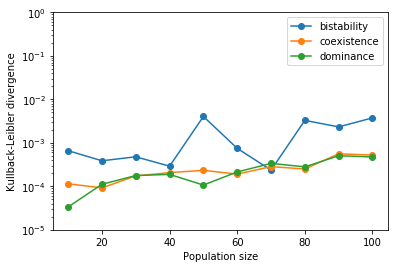

In [14]:
fig, ax = plt.subplots()
ax.plot(df_stat_b.loc[:,"n"], df_stat_b.loc[:,"bistability"], '-o', label='bistability')
ax.plot(df_stat_b.loc[:,"n"], df_stat_b.loc[:,"coexistence"], '-o', label='coexistence')
ax.plot(df_stat_b.loc[:,"n"], df_stat_b.loc[:,"dominance"], '-o', label='dominance')
ax.set_yscale('log')
ax.legend()
plt.ylim([10**(-5),10**(0)])
#plt.ylim([0,0.1])
plt.xlabel("Population size")
plt.ylabel("Kullback-Leibler divergence")

In [ ]:
fig.savefig('../../../manuscript/Figures/accuracy_simulated_stationary_b.pdf')

### c) beta = 10.0, mu = 0.1

In [15]:
kullback_c = []
for n in n_values:
    #dominance
    distr_sim_dom = estimate_stationary(pop_size=n, beta=0.1, a=1.0, b=1.0, c=0.0, d=0.0, r_0=100*n, epsilon=0.0001, k=10000*n, mu=0.1)
    distr_direct_dom = direct_stationary(pop_size=n, beta=0.1, a=1.0, b=1.0, c=0.0, d=0.0, mu=0.1)
    
    #bistability
    distr_sim_bistab = estimate_stationary(pop_size=n, beta=10, a=1.0, b=0.0, c=0.0, d=1.0, r_0=100*n, epsilon=0.0001, k=10000*n, mu=0.1)
    distr_direct_bistab = direct_stationary(pop_size=n, beta=10, a=1.0, b=0.0, c=0.0, d=1.0, mu=0.1)
    
    #coexistence
    distr_sim_coex = estimate_stationary(pop_size=n, beta=10, a=0.0, b=1.0, c=1.0, d=0.0, r_0=100*n, epsilon=0.0001, k=10000*n, mu=0.1)
    distr_direct_coex = direct_stationary(pop_size=n, beta=10, a=0.0, b=1.0, c=1.0, d=0.0, mu=0.1)
    
    kullback_leibler_dom = entropy(distr_sim_dom, distr_direct_dom)
    kullback_leibler_coex = entropy(distr_sim_coex, distr_direct_coex)
    kullback_leibler_bistab = entropy(distr_sim_bistab, distr_direct_bistab)
    
    kullback_c.append({"n": n, "dominance": kullback_leibler_dom, "coexistence": kullback_leibler_coex, "bistability": kullback_leibler_bistab})

In [16]:
df_stat_c = pd.DataFrame(kullback_c)
df_stat_c.set_index("n")

,bistability,coexistence,dominance
n,,,
10,0.000119,0.000102,0.000487
20,0.005982,0.000098,0.000475
30,0.693189,0.000228,0.000319
40,0.693209,0.000339,0.000360
50,0.693283,0.000219,0.001014
60,0.693180,0.000649,0.000365
70,0.693373,0.000834,0.000263
80,0.693242,0.000714,0.000284
90,0.693239,0.001199,0.000634


Text(0,0.5,'Kullback-Leibler divergence')

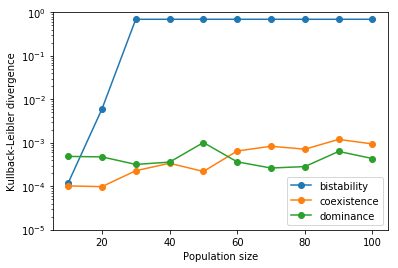

In [17]:
fig, ax = plt.subplots()
ax.plot(df_stat_c.loc[:,"n"], df_stat_c.loc[:,"bistability"], '-o', label='bistability')
ax.plot(df_stat_c.loc[:,"n"], df_stat_c.loc[:,"coexistence"], '-o', label='coexistence')
ax.plot(df_stat_c.loc[:,"n"], df_stat_c.loc[:,"dominance"], '-o', label='dominance')
ax.legend()
ax.set_yscale('log')
plt.ylim([10**(-5),10**(0)])
plt.xlabel("Population size")
plt.ylabel("Kullback-Leibler divergence")

In [ ]:
fig.savefig('../../../manuscript/Figures/accuracy_simulated_stationary_c.pdf')

### d) beta = 10.0, mu = 0.5

In [18]:
kullback_d = []
for n in n_values:
    #dominance
    distr_sim_dom = estimate_stationary(pop_size=n, beta=10, a=1.0, b=1.0, c=0.0, d=0.0, r_0=100*n, epsilon=0.0001, k=10000*n, mu=0.5)
    distr_direct_dom = direct_stationary(pop_size=n, beta=10, a=1.0, b=1.0, c=0.0, d=0.0, mu=0.5)
    
    #bistability
    distr_sim_bistab = estimate_stationary(pop_size=n, beta=10, a=1.0, b=0.0, c=0.0, d=1.0, r_0=100*n, epsilon=0.0001, k=10000*n, mu=0.5)
    distr_direct_bistab = direct_stationary(pop_size=n, beta=10, a=1.0, b=0.0, c=0.0, d=1.0, mu=0.5)
    
    #coexistence
    distr_sim_coex = estimate_stationary(pop_size=n, beta=10, a=0.0, b=1.0, c=1.0, d=0.0, r_0=100*n, epsilon=0.0001, k=10000*n, mu=0.5)
    distr_direct_coex = direct_stationary(pop_size=n, beta=10, a=0.0, b=1.0, c=1.0, d=0.0, mu=0.5)
    
    kullback_leibler_dom = entropy(distr_sim_dom, distr_direct_dom)
    kullback_leibler_coex = entropy(distr_sim_coex, distr_direct_coex)
    kullback_leibler_bistab = entropy(distr_sim_bistab, distr_direct_bistab)
    
    kullback_d.append({"n": n, "dominance": kullback_leibler_dom, "coexistence": kullback_leibler_coex, "bistability": kullback_leibler_bistab})


In [19]:
df_stat_d = pd.DataFrame(kullback_d)
df_stat_d.set_index("n")

,bistability,coexistence,dominance
n,,,
10,0.000075,0.000041,0.000043
20,0.000065,0.000129,0.000114
30,0.000158,0.000148,0.000198
40,0.000082,0.000172,0.000392
50,0.000219,0.000287,0.000299
60,0.000135,0.000197,0.000300
70,0.000306,0.000643,0.000228
80,0.000403,0.000355,0.000372
90,0.000466,0.001209,0.000258


Text(0,0.5,'Kullback-Leibler divergence')

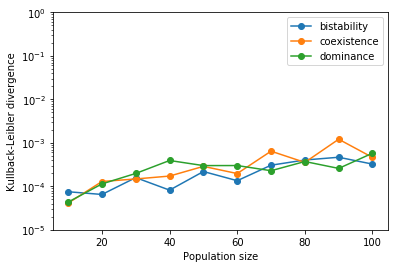

In [20]:
fig, ax = plt.subplots()
ax.plot(df_stat_d.loc[:,"n"], df_stat_d.loc[:,"bistability"], '-o', label='bistability')
ax.plot(df_stat_d.loc[:,"n"], df_stat_d.loc[:,"coexistence"], '-o', label='coexistence')
ax.plot(df_stat_d.loc[:,"n"], df_stat_d.loc[:,"dominance"], '-o', label='dominance')
ax.legend()
ax.set_yscale('log')
plt.ylim([10**(-5),10**(0)])
plt.xlabel("Population size")
plt.ylabel("Kullback-Leibler divergence")

In [ ]:
fig.savefig('../../../manuscript/Figures/accuracy_simulated_stationary_d.pdf')